In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1><center> CLUSTER ANALYSIS </h1></center>

<h3><center> K-MEANS </h3></center>

K-means algorithm fids paterns in the dataset. The steps are the following:
- Choose the number $K$ of clusters. There are several ways to determine the correct number of clusters. One of them is the $WCSS = \sum_{C_j} \sum_{P_i \in C_j} d(P_i,C_j)^2 $. Then, with the *elbow method* determines the optimal number of clusters.
- Select at random the $K$ centroid. They can be also points that don't belong to the dataset. We can face to the *random initialization trap* that can be overcome with the *K-means ++*.
- Assign each data point to the closest centroid.
- Compute and place the new centroid of each cluster.
- Reassign each data point to the new centroid. 
- Repeat.

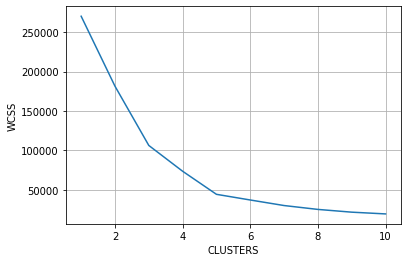

In [50]:
data = pd.read_csv('Dataset/Mall_Customers.csv')

# dataset mustn't be splitted due to teh absence of Y and X.
data = data.iloc[:,[3,4]].values

# PERFORMING THE ELBOW METHOD.
from sklearn.cluster import KMeans

wcss = []
clusters = 11

for loop in range (1,clusters):
    KM = KMeans(n_clusters=loop, init = 'k-means++', random_state = 42).fit(data)
    wcss.append(KM.inertia_)
    
plt.plot(range(1,clusters), wcss)
plt.grid(True)
plt.xlabel('CLUSTERS')
plt.ylabel('WCSS')
plt.show()

In [51]:
# PERFORMING THE K-MEANS ALGORITHM.
y_pred = KMeans(n_clusters=5, init = 'k-means++', random_state = 42).fit_predict(data); 

In [27]:
np.argmin(wcss)

9

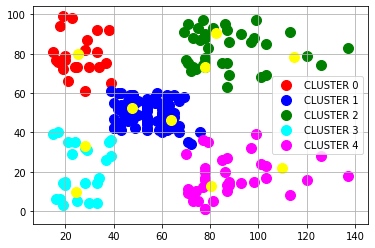

In [86]:
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range (0,5):
    plt.scatter(data[y_pred == i,0], data[y_pred == i,1], s = 100, c = colors[i], label = 'CLUSTER ' + str(i))
plt.scatter(KM.cluster_centers_[:,0], KM.cluster_centers_[:,1], color = 'yellow', s = 100)
plt.grid(True)
plt.legend()
plt.show()

<h3><center> HIERARCHICAL CLUSTER </h3></center>

There are two types of algorithms:
- _Agglomerative_ : it's made by the following steps:
  - Each point is a cluster.
  - Select a cluster and merge it with the closest.
  So, this techniques require the definition of the distance between clusters, such as the distance between the closest points or the furthest, the average distance or the distant between centroid. The memory of the process is stored into the _dendogram_, namely a tree in which the height of the rectangulars is the euclidean distance in the between clusters. Then, we set the number of clusters with the threshold of dissimilarity that we can accept. The optimal number of clusters is determined by the vertical line which isn't intersected by other horizontal lines.
- _Divisive_

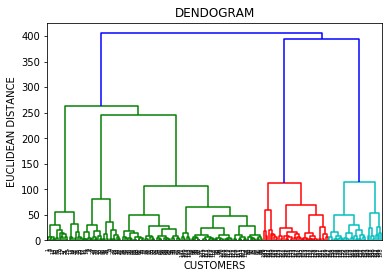

In [10]:
data = pd.read_csv('Dataset/Mall_Customers.csv')

# dataset mustn't be splitted due to teh absence of Y and X.
X = data.iloc[:,[3,4]].values

import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('DENDOGRAM')
plt.ylabel('EUCLIDEAN DISTANCE')
plt.xlabel('CUSTOMERS')
plt.show()

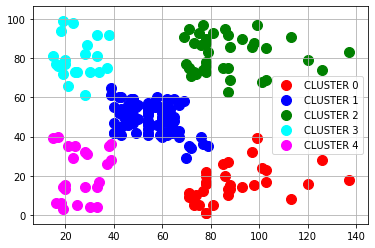

In [15]:
# the optimal number of cluster is associated to the highest line which doesn't 
# intersect one vertical line.

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_pred = hc.fit_predict(X)

colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range (0,5):
    plt.scatter(X[y_pred == i,0], X[y_pred == i,1], s = 100, c = colors[i], label = 'CLUSTER ' + str(i))
plt.grid(True)
plt.legend()
plt.show()